# Predicting House Prices, A Stupid Approach

## Exploring The Data

In [28]:
# Numpy has a bunch of great utilities
import numpy as np
# To pull data in we'll use a library called "Pandas"
import pandas as pd
# We'll use matplotlib to graph stuff
import matplotlib.pyplot as plt

In [29]:
# We're given a train file (data that has the correct prices)
train = pd.read_csv('train.csv')
# We're also given a test file (houses for which we don't know the price)
test = pd.read_csv('test.csv')

In [30]:
# Before doing anything lets take a look at this data
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


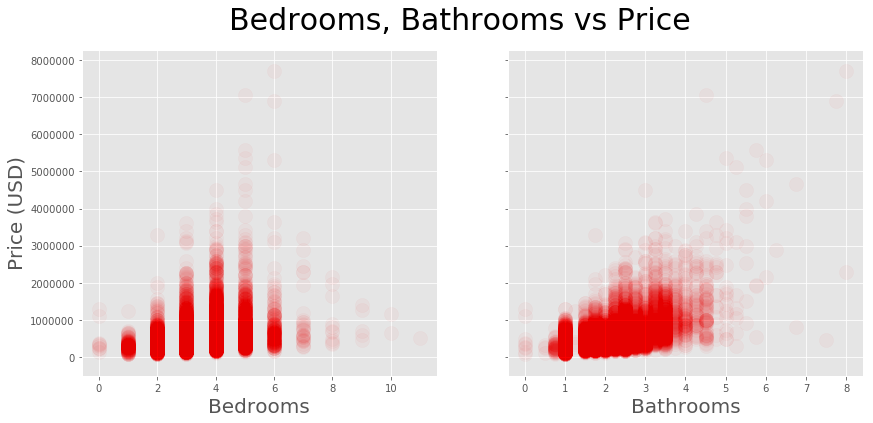

In [31]:
# Graph price vs bedrooms and bathrooms
from matplotlib.colors import LogNorm
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,6))
ax1.scatter(train['bedrooms'], train['price'], c=(1, 0, 0, 0.03), s=200)
ax1.set_xlabel("Bedrooms", fontsize=20)
ax1.set_ylabel("Price (USD)", fontsize=20)
ax2.scatter(train['bathrooms'], train['price'], c=(1, 0, 0, 0.03), s=200)
ax2.set_xlabel("Bathrooms", fontsize=20)
fig.suptitle("Bedrooms, Bathrooms vs Price", fontsize=30)
plt.show()

## Prepping our Data for Use

In [32]:
# We want to clean our data
# There is a lot more we could do here,
# but we're just going to replace all missing values with 0
train = train.fillna(0)
test = test.fillna(0)

In [33]:
# Finally, before we build a model we need to seperate our training data
# set into an X (the predictive variables) and y (the target variable)
X_train = train[['bedrooms', 'bathrooms']]
y_train = train['price']
# For the test set we only have the predictive variable
X_test = test[['bedrooms', 'bathrooms']]

## Building a (pretty bad) Model

In [40]:
# Here is a very naive model
def model(data_frame):
    # We want to associate values with each bedroom and bathroom
    # Our first training record has a price of $221,900, 3 bedrooms, and 1 bathroom
    # Lets say bedrooms and bathrooms are the only thing that matters
    # Furthermore, lets say each bedroom is worth 60k, and each bathroom is worth 40k
    # Looking at our first example:
    #     (3 bedrooms * 60k per bedroom) + (1 bathroom * 40k per bathroom)
    #     = 180,000 + 40,000
    #     = $220,000; that's pretty close!
    
    # So we start by assigning weights to each attribute we're looking at
    value_per_bedroom = 61000
    value_per_bathroom = 41000
    # Next we define a function to use those weight and the available data to return a prediction
    predicted_value = lambda input_data: input_data[0] * value_per_bedroom + input_data[1] * value_per_bathroom
    # Finally we apply that function to every row of data (every house) we have and return the result
    return data_frame.apply(predicted_value, axis=1)

## Testing that (pretty bad) Model

In [41]:
# So we have a model, but we want to know how it does
# An easy metric to use is the Root Mean Squared Percentage Error
# This function accepts the real values of y and the predicted values yp
def root_mean_squared_error(y, yp):
    # The squared percentage error is just:
    #     the difference between actual and predicted
    #     divided by the actual value
    #     raised to the power of 2
    # Here we do that for every y, yp pair
    squared_error = [((yi - ypi) / yi) ** 2 for yi, ypi in zip(y, yp)]
    # Next we take the mean of all those errors
    mean_squared_error = sum(squared_error)/len(squared_error)
    # And take the root of that (to 'undo' the original squaring)
    root_mean_squared_error = mean_squared_error ** 0.5
    return root_mean_squared_error

In [42]:
# So now we can actually run our data through our model
y_train_predictions = model(X_train)
# And we can evaluate it using the "root mean squared error"
rmse = root_mean_squared_error(y_train.values, y_train_predictions.values)
print("Root Mean Squared Error", rmse)

Root Mean Squared Error 0.44997649285


In [43]:
# If we're comfortable with that performance, we can predict prices for our test data
y_test_predictions = model(X_test)
# And then save them to a csv file
predictions_df = pd.DataFrame({'price':y_test_predictions, 'id':test['id']}).set_index('id')
predictions_df.to_csv('stupid-model.csv')
# That file is then something we could submit to Kaggle